# # 各类满意度分析

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 设置中文显示
# ================================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ================================
# 1. 读取数据
# ================================
df = pd.read_csv('../../data/intermediate/初步清洗_比赛数据_2.csv', sep=',', engine='python', encoding='utf-8')
df = df.map(lambda x: x.strip('\t') if isinstance(x, str) else x)

# ================================
# 2. 定义分类
# ================================
xxqk = ['课前预学','课堂参与','课后复习','延伸阅读','完成作业时间','自习时间','课外阅读时间','网络课程时间','实验科研时间',
        '社团活动时间','竞赛活动时间','其他学习时间','同学合作','参与科研团队','参与学科竞赛','学习同学方法','师生交流频度']
sz = ['思政课总体满意度','思政课设置满意度','思政课内容满意度','思政课质量满意度','思政课效果满意度']
zy = ['专业课知识融合','专业课解决问题能力','专业课交叉融合','专业课实践结合','专业课努力程度','专业课前沿内容',
      '传统讲授','课堂互动','案例讨论','小组合作']
ty = ['体育教育满意度']
my = ['美育教育满意度']
ld = ['劳动教育满意度']
xy = ['社团活动满意度','校园文化满意度','创新创业满意度','国际交流满意度','社会实践满意度']
sx = ['实习内容满意度','实习时间满意度','实习场地满意度','实习指导满意度']
zwts = ['问题解决能力提升','自主学习能力提升','合作能力提升','表达沟通能力提升','未来规划能力提升','人文底蕴提升',
        '科学精神提升','学会学习提升','健康生活提升','责任担当提升','实践创新提升','自我提升']
lsj = ['教师履职满意度','关爱学生满意度','教学投入满意度','教师总体满意度','课程目标解释','激发学习兴趣',
       '课后辅导答疑','立德树人','创造性思考']
sxfw = ['一站式服务','实训安全管理','教师参与活动','学术讲座多','心理健康满意度','职业规划满意度',
        '班主任工作满意度','学业指导满意度','资助工作满意度']
jctj = ['教室设备满意度','实训室满意度','图书馆满意度','网络资源满意度','体育设施满意度','住宿条件满意度','学校整体满意度']

categories = {
    '学习情况': xxqk,
    '思政课': sz,
    '专业课': zy,
    '体育教育': ty,
    '美育教育': my,
    '劳动教育': ld,
    '校园生活': xy,
    '实习': sx,
    '自我提升': zwts,
    '老师教育': lsj,
    '学校服务': sxfw,
    '学校基础条件': jctj
}



In [7]:
# ================================
# 3. 计算每类的均值
# ================================
for cat, cols in categories.items():
    df[cat + '_均值'] = df[cols].mean(axis=1)

feature_cols = [c + '_均值' for c in categories.keys()]

In [8]:
# ================================
# 4. 定义映射函数
# ================================
def map_satisfaction(x):
    if x >= 0.9:
        return "满意"
    elif x >= 0.75:
        return "较满意"
    elif x >= 0.6:
        return "一般"
    elif x >= 0.4:
        return "较不满意"
    else:
        return "不满意"

# 应用映射
for col in feature_cols:
    df[col + "_等级"] = df[col].apply(map_satisfaction)

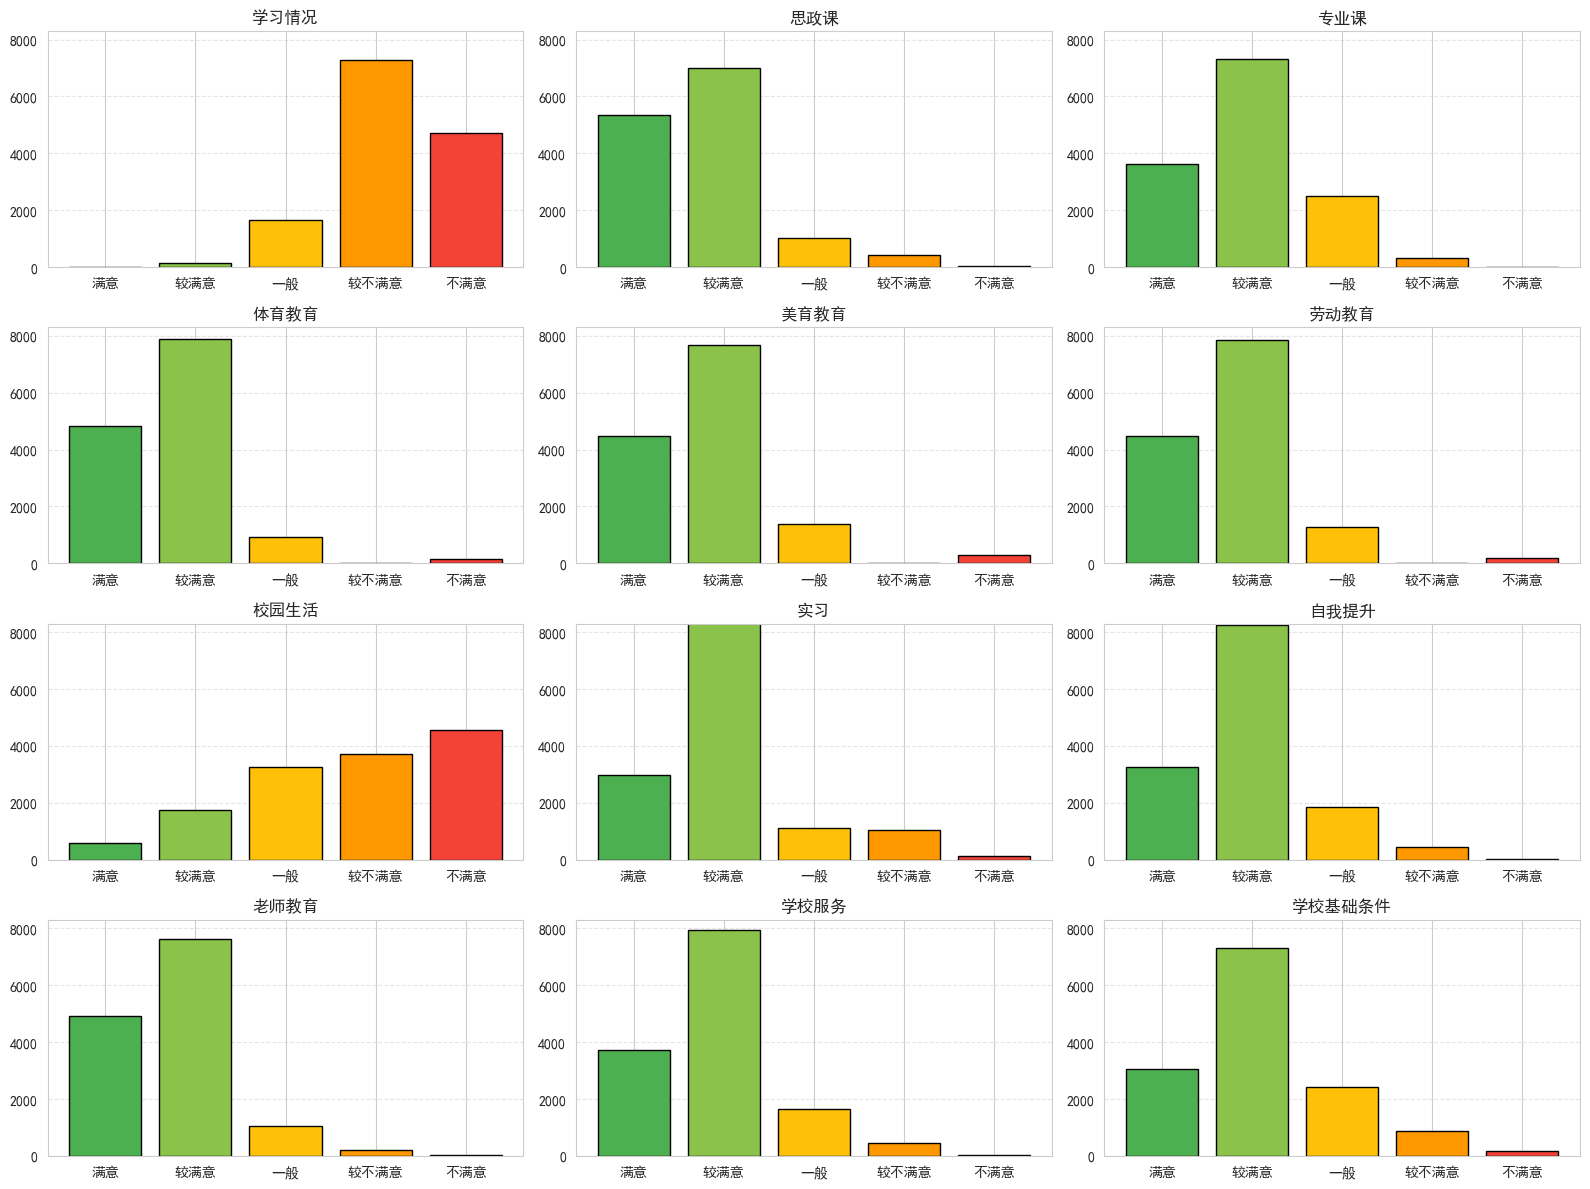

In [9]:
# ================================
# 5. 绘制多子图柱状图
# ================================
satisfaction_order = ["满意","较满意","一般","较不满意","不满意"]
colors = ["#4CAF50", "#8BC34A", "#FFC107", "#FF9800", "#F44336"]  # 绿色到红色渐变

n = len(categories)
cols = 3  # 每行显示3个子图
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, rows*3))
axes = axes.flatten()

for i, cat in enumerate(categories.keys()):
    counts = df[cat + "_均值_等级"].value_counts().reindex(satisfaction_order, fill_value=0)
    axes[i].bar(satisfaction_order, counts.values, color=colors, edgecolor='black')
    axes[i].set_title(cat, fontsize=12)
    axes[i].set_ylim(0, df.shape[0]*0.6)  # y轴统一
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# 删除多余子图
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [11]:
import json

# ================================
# 6. 打印 JSON 数据
# ================================
result = {}

for cat in categories.keys():
    counts = df[cat + "_均值_等级"].value_counts().reindex(satisfaction_order, fill_value=0)
    result[cat] = {
        "labels": satisfaction_order,
        "values": counts.values.tolist()
    }

# 打印格式化后的 JSON
print(json.dumps(result, ensure_ascii=False, indent=2))


{
  "学习情况": {
    "labels": [
      "满意",
      "较满意",
      "一般",
      "较不满意",
      "不满意"
    ],
    "values": [
      0,
      158,
      1659,
      7277,
      4732
    ]
  },
  "思政课": {
    "labels": [
      "满意",
      "较满意",
      "一般",
      "较不满意",
      "不满意"
    ],
    "values": [
      5344,
      6997,
      1038,
      406,
      41
    ]
  },
  "专业课": {
    "labels": [
      "满意",
      "较满意",
      "一般",
      "较不满意",
      "不满意"
    ],
    "values": [
      3639,
      7327,
      2511,
      331,
      18
    ]
  },
  "体育教育": {
    "labels": [
      "满意",
      "较满意",
      "一般",
      "较不满意",
      "不满意"
    ],
    "values": [
      4834,
      7905,
      922,
      0,
      165
    ]
  },
  "美育教育": {
    "labels": [
      "满意",
      "较满意",
      "一般",
      "较不满意",
      "不满意"
    ],
    "values": [
      4462,
      7685,
      1395,
      0,
      284
    ]
  },
  "劳动教育": {
    "labels": [
      "满意",
      "较满意",
      "一般",
      "较不满意",
      "不满意"
    ],
 

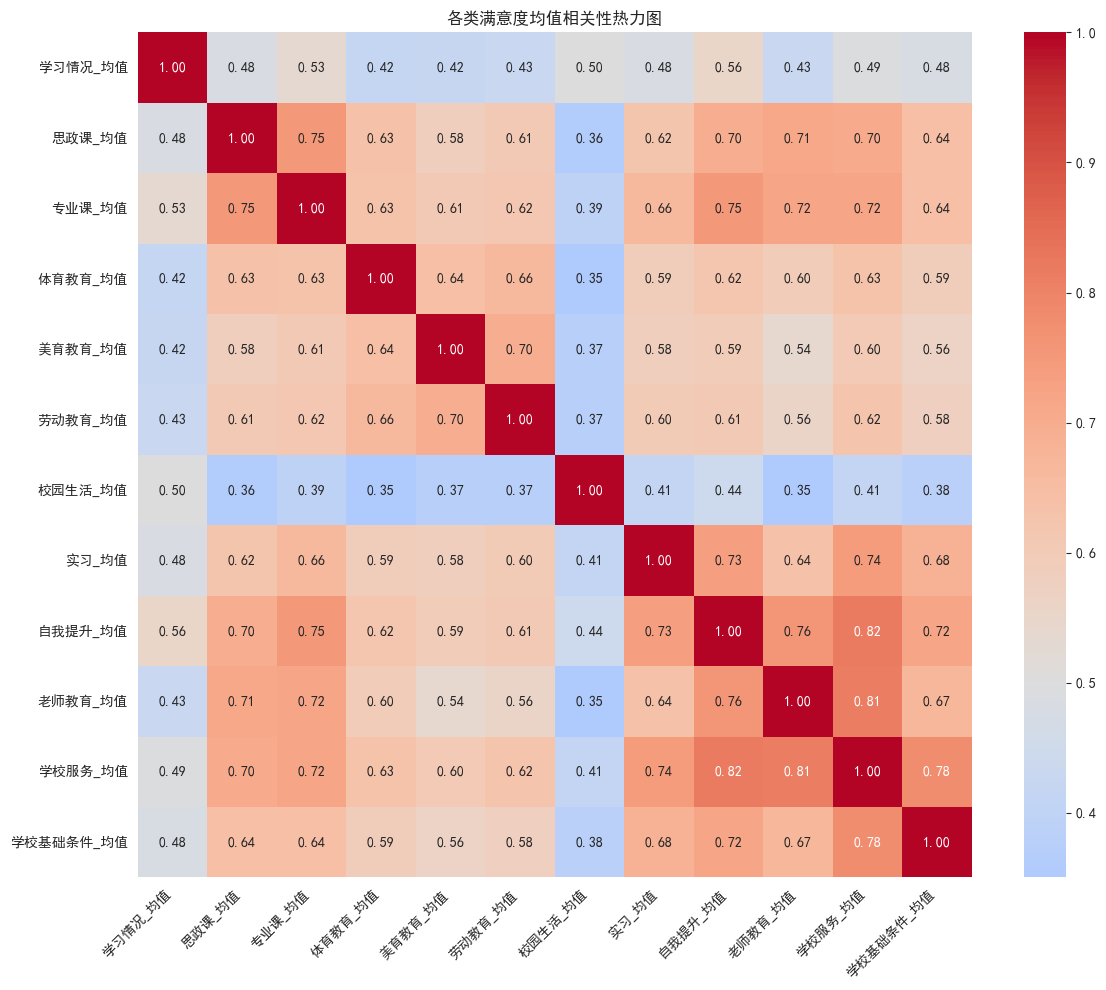

In [10]:
# ================================
# 4. 计算相关系数
# ================================
corr = df[feature_cols].corr()

# ================================
# 5. 绘制热力图
# ================================
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",center=0.5)
plt.title("各类满意度均值相关性热力图")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
# ================================
# 6. 导出相关系数 JSON 数据
# ================================
corr_dict = {
    "labels": corr.columns.tolist(),
    "matrix": corr.values.tolist()
}


print(json.dumps(corr_dict, ensure_ascii=False, indent=2))


{
  "labels": [
    "学习情况_均值",
    "思政课_均值",
    "专业课_均值",
    "体育教育_均值",
    "美育教育_均值",
    "劳动教育_均值",
    "校园生活_均值",
    "实习_均值",
    "自我提升_均值",
    "老师教育_均值",
    "学校服务_均值",
    "学校基础条件_均值"
  ],
  "matrix": [
    [
      1.0,
      0.4844901770750696,
      0.5340979198250606,
      0.41671826966699893,
      0.42153250457163377,
      0.4277830905742099,
      0.5037861518379083,
      0.48446818337216324,
      0.5557760626634365,
      0.42736483904576605,
      0.49250009577896525,
      0.47915811883406606
    ],
    [
      0.4844901770750696,
      1.0,
      0.753073404063555,
      0.6349561832828398,
      0.5842628088580388,
      0.608258038878638,
      0.35804446365636505,
      0.6228033818522853,
      0.6960766616695114,
      0.7145814347356202,
      0.7036766429509832,
      0.6418378963781293
    ],
    [
      0.5340979198250606,
      0.753073404063555,
      1.0,
      0.6308514283203415,
      0.6071570935147879,
      0.6157524781792459,
      0.39166500844